In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42, cluster_std=0.60)

df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['TrueCluster'] = y

print("Sample Data:")
print(df.head())
print(f"\nDataset shape: {df.shape}")
print(f"Unique clusters: {df['TrueCluster'].nunique()}")

Sample Data:
    Feature1  Feature2  TrueCluster
0  -9.113944  6.813616            3
1  -9.354576  7.092790            3
2  -2.015671  8.281780            0
3  -7.010236 -6.220843            2
4 -10.061202  6.718671            3

Dataset shape: (300, 3)
Unique clusters: 4


In [5]:
np.random.seed(42)

km = KMeans(n_clusters=4, random_state=42, n_init=10)

km.fit(X)

predicted = km.labels_
centers = km.cluster_centers_

df['KMeans_Label'] = predicted

print("Finished K-Means fitting!")
print(f"Total clusters: {len(centers)}")
print(f"Inertia: {km.inertia_:.2f}")

Finished K-Means fitting!
Total clusters: 4
Inertia: 203.89


C:\Users\LOURDYNMAKABALIGUTIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


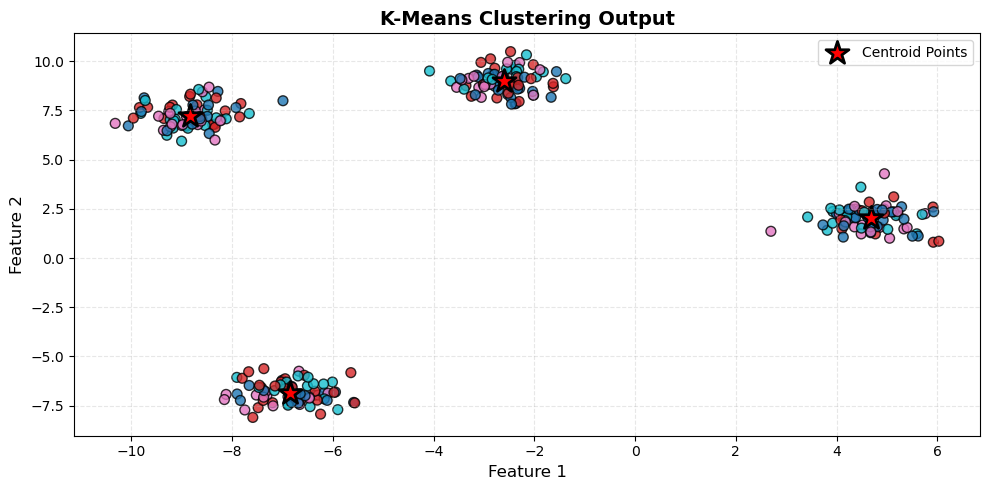


Centroid Locations:
  Group 0: (-2.61, 8.99)
  Group 1: (-6.85, -6.85)
  Group 2: (4.69, 2.01)
  Group 3: (-8.83, 7.24)


In [10]:
plt.figure(figsize=(10, 5))

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=50, alpha=0.8, edgecolors='k')

plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='*', s=300,
            label='Centroid Points', edgecolors='black', linewidths=2)

plt.title('K-Means Clustering Output', fontsize=14, fontweight='bold')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nCentroid Locations:")
for i, centroid in enumerate(centers):
    print(f"  Group {i}: ({centroid[0]:.2f}, {centroid[1]:.2f})")